<a href="https://colab.research.google.com/github/devashree1923/fake-news-datasets/blob/master/Fake_News_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import defaultdict, Counter
import string
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# load train data
train = pd.read_csv('/content/sample_data/train.csv')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# Handling nan values in dataset using empty spaces
def handle_nan(train_data):
    '''Input: Data to the function containing Nan values.
       Output : Cleaned data containing no Nan values.
       Function: Cleaning Nan values.
     '''
    train = train_data.fillna(" ")
    return train

train = handle_nan(train)

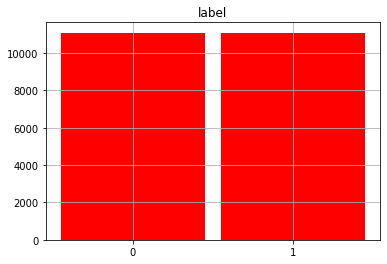

In [12]:
# Class balance analysis
train[['label']].hist(bins = 3)
plt.bar(np.arange(len([0,1])), train.groupby(['label']).size().values, 0.9,  color="red")
plt.xticks(np.arange(len([0,1])), [0,1])
plt.show()

In [21]:
# Remove stopwords from title and text by label
messages_fake=train[train.label==1].copy()
messages_not_fake=train[train.label==0].copy()

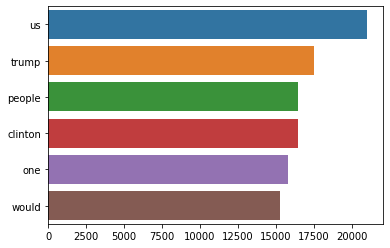

In [22]:
# Corpus analysis corpus_text_fake
stop=set(stopwords.words('english'))
messages_fake['text'] = messages_fake['text'].str.lower()
messages_fake['text'] = messages_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_fake['text'].str.split()
new=new.values.tolist()
corpus_text_fake=[word for i in new for word in i]

counter=Counter(corpus_text_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

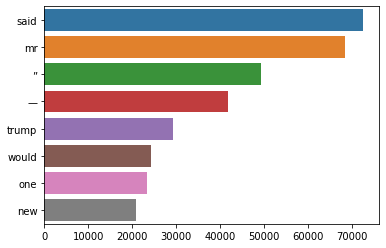

In [23]:
# Corpus analysis corpus_text_not_fake
stop=set(stopwords.words('english'))
messages_not_fake['text'] = messages_not_fake['text'].str.lower()
messages_not_fake['text'] = messages_not_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_not_fake['text'].str.split()
new=new.values.tolist()
corpus_text_not_fake=[word for i in new for word in i]

counter=Counter(corpus_text_not_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [25]:
# Function for word cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

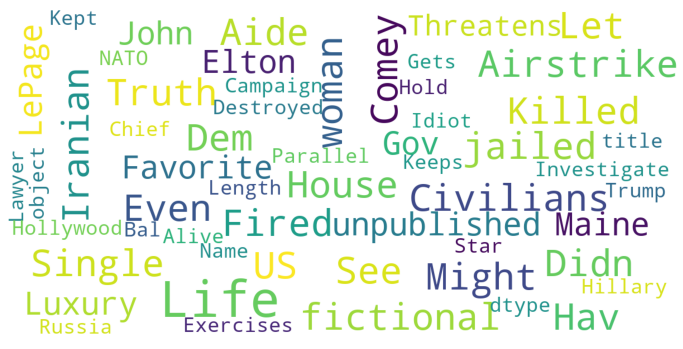

In [26]:
# Word cloud for corpus_title_fake
show_wordcloud(messages_fake['title'])

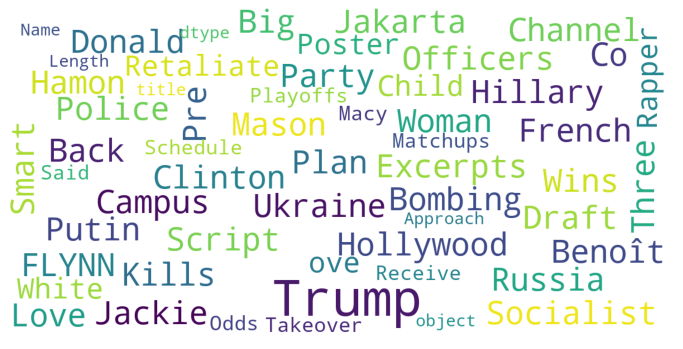

In [27]:
# Word cloud for corpus_title_not_fake
show_wordcloud(messages_not_fake['title'])

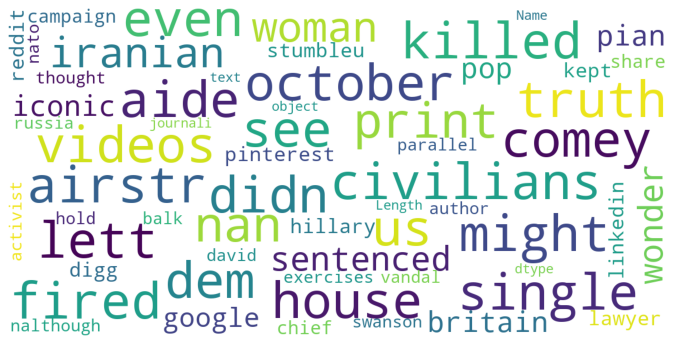

In [28]:
# Word cloud for corpus_text_fake
show_wordcloud(messages_fake['text'])

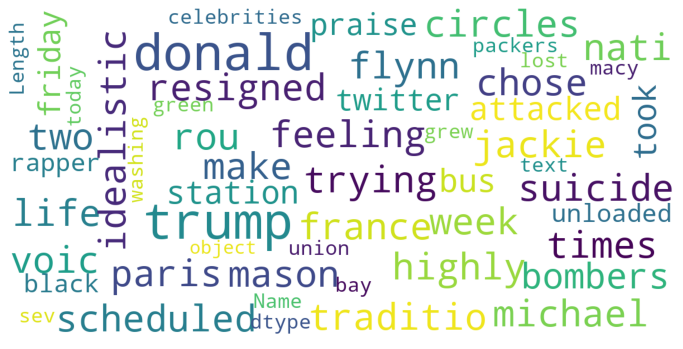

In [29]:
# Word cloud for corpus_text_not_fake
show_wordcloud(messages_not_fake['text'])